On an n x n chessboard, a knight starts at the cell (row, column) and attempts to make exactly k moves. The rows and columns are 0-indexed, so the top-left cell is (0, 0), and the bottom-right cell is (n - 1, n - 1).

A chess knight has eight possible moves it can make, as illustrated below. Each move is two cells in a cardinal direction, then one cell in an orthogonal direction.

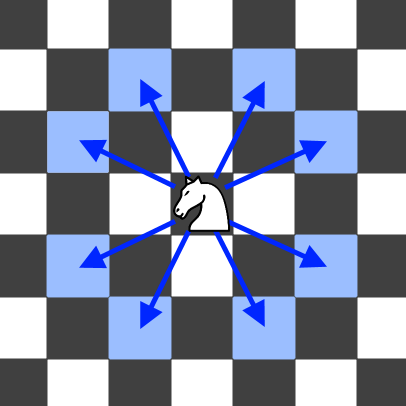

Each time the knight is to move, it chooses one of eight possible moves uniformly at random (even if the piece would go off the chessboard) and moves there.

The knight continues moving until it has made exactly k moves or has moved off the chessboard.

Return the probability that the knight remains on the board after it has stopped moving.

 

Example 1:

Input: n = 3, k = 2, row = 0, column = 0
Output: 0.06250
Explanation: There are two moves (to (1,2), (2,1)) that will keep the knight on the board.
From each of those positions, there are also two moves that will keep the knight on the board.
The total probability the knight stays on the board is 0.0625.

Example 2:

Input: n = 1, k = 0, row = 0, column = 0
Output: 1.00000

 

Constraints:

    1 <= n <= 25
    0 <= k <= 100
    0 <= row, column <= n - 1



In [ ]:
class Solution:
    def knightProbability(self, n: int, k: int, row: int, column: int) -> float:
        directions = [(1, 2), (1, -2), (-1, 2), (-1, -2),
                      (2, 1), (2, -1), (-2, 1), (-2, -1)]

        # Initialize the dynamic programming table
        dp = [[[0] * n for _ in range(n)] for _ in range(k + 1)]
        dp[0][row][column] = 1

        # Iterate over the number of moves
        for moves in range(1, k + 1):
            # Iterate over the cells on the chessboard
            for i in range(n):
                for j in range(n):
                    # Iterate over possible directions
                    for direction in directions:
                        prev_i, prev_j = i - direction[0], j - direction[1]
                        # Check if the previous cell is within the chessboard
                        if 0 <= prev_i < n and 0 <= prev_j < n:
                            # Add the previous probability
                            dp[moves][i][j] += dp[moves - 1][prev_i][prev_j]
                    # Divide by 8
                    dp[moves][i][j] /= 8

        # Calculate total probability by summing probabilities for all cells
        total_probability = sum(
            dp[k][i][j]
            for i in range(n)
            for j in range(n)
        )
        return total_probability